In [34]:
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xlwt
import xlrd
import openpyxl

In [35]:
workbook=openpyxl.load_workbook("datasets/beiker.xlsx")

for i in range(4):
    worksheet=workbook.worksheets[i]
    for k in range(1,worksheet.max_row+1):
        val = worksheet.cell(k,2).value
        val = val.strip("\n")
        val = val.strip()
        worksheet.cell(k,2).value = val
workbook.save("beiker.xlsx")



In [36]:
xlsx = pd.ExcelFile("datasets/beiker.xlsx")
df = pd.read_excel(xlsx, 0)
df1 = pd.read_excel(xlsx, 1)
df2 = pd.read_excel(xlsx, 2)
df3 = pd.read_excel(xlsx, 3)
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)
df = df.drop(columns="序号")

df = df[pd.to_numeric(df['室'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['厅'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['楼层'], errors='coerce').notnull()]


df['室'] = df['室'].astype(float)
df['厅'] = df['厅'].astype(float)
df['平米'] = df['平米'].astype(float)
df['楼层'] = df['楼层'].astype(float)
df['价格'] = df['价格'].astype(float)
print(df[:5])

                  标题    室    厅    平米   楼层           地址      价格           标签
0     整租·王满小区 1室1厅 南  1.0  1.0  37.0  5.0     长宁西郊王满小区  4400.0      近地铁随时看房
1  整租·梅陇十一村 2室0厅 南/北  2.0  0.0  49.0  6.0  徐汇华东理工梅陇十一村  4450.0       精装随时看房
2     整租·田林六村 1室1厅 南  1.0  1.0  32.0  6.0     徐汇田林田林六村  4700.0  新上近地铁精装随时看房
3      整租·寿昌坊 1室1厅 南  1.0  1.0  39.0  6.0      徐汇康健寿昌坊  4200.0       新上随时看房
4     整租·长桥六村 1室1厅 南  1.0  1.0  44.0  6.0     徐汇长桥长桥六村  3500.0         随时看房


In [37]:
df_y = df["价格"]
df_X = df.drop(columns=["价格"])
df_X = df_X.drop(columns=["标签"])
df_X = df_X.drop(columns=["标题"])
df_X = df_X.drop(columns=["地址"])

X = df_X.to_numpy()
y = df_y.to_numpy()

print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])

(11899, 4)
(11899,)
[[ 1.  1. 37.  5.]
 [ 2.  0. 49.  6.]
 [ 1.  1. 32.  6.]
 [ 1.  1. 39.  6.]
 [ 1.  1. 44.  6.]]
[4400. 4450. 4700. 4200. 3500.]


### Plotting the datas
  
Using pandas to show the relationships between datas:


/Users/xuyile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xuyile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xuyile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xuyile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xuyile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/xuyile/opt/anaconda3/lib/python3.8/site-packages/matp

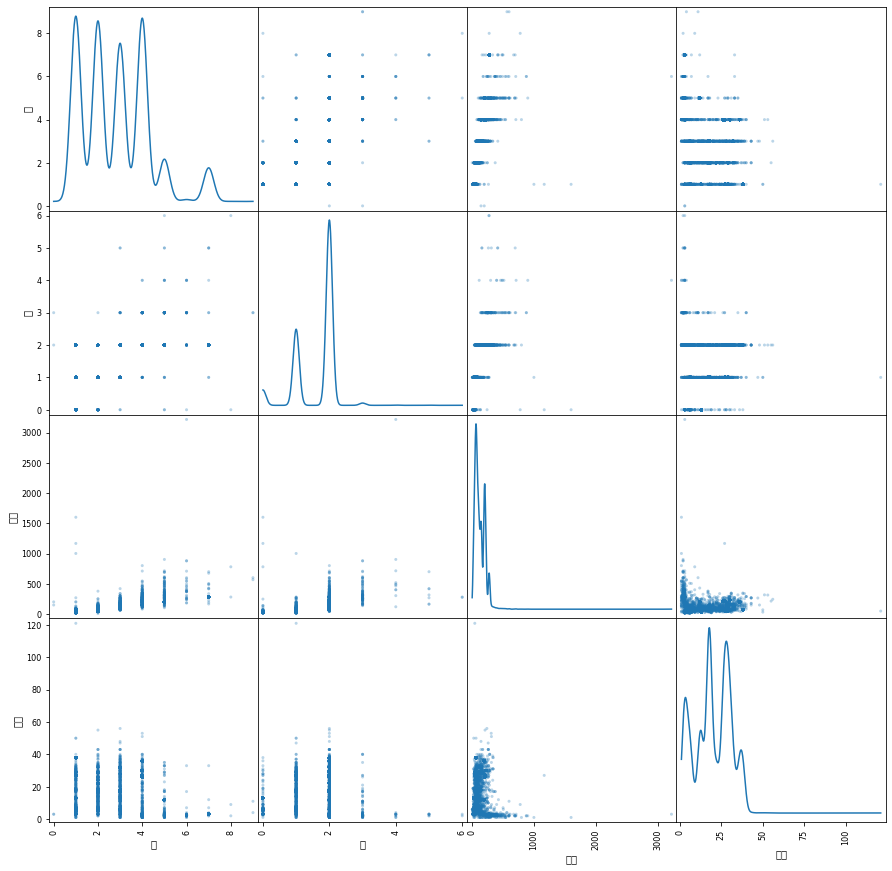

In [38]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_X[["室","厅","平米","楼层"]],alpha=0.3,diagonal='kde',figsize=(15,15));

### Linear Regression

#### Progresses  
>**Using BedRoom, LivingRoom, Area, Floor, Predicting Price with Linear Regression**
>
>* Training: dataset with 9519 entries 
>* Testing: dataset with 2380 entries
>* Train error: 0.08886
>* Test error: 0.23189

#### Todo Lists  
>* **Mapping the Address Data, Trying to get a more Generalized Prediction**  
>* **Optimizing it using Cross-Validation**

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(9519, 4)
(2380, 4)


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


X_train = np.hstack((np.ones([len(X_train),1]), X_train))
X_test  = np.hstack((np.ones([len(X_test),1]), X_test))

In [41]:
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test  = scaler.fit_transform(y_test.reshape(-1,1))

In [42]:
def calc_gradient(Y,X,w):  
    
    M = Y.shape[0]
    loss = np.sum(np.power(Y-np.dot(X,w),2)) / (2*M)
    gradient = np.dot(X.T ,np.dot(X,w)-Y)/M
    
    
    return {'gradient': gradient,'loss': loss}

In [43]:
alphas = [0.3,0.05,0.01]
losses = [[],[],[]]
test_losses = []
for ind,alpha in enumerate(alphas):
    print("ALPHA:",alpha)
    w = np.ones([X_train.shape[1],1])
    for epoch in range(100):
        output = calc_gradient(y_train,X_train,w)
        
        #print("Loss for epoch",epoch,":",output['loss'])
        
        losses[ind].append(output['loss'])
        for i in range(w.shape[0]):
            w[i] -= alpha*output['gradient'][i]
    
    test_output = calc_gradient(y_test,X_test,w)
    print("Train Loss",epoch,":",output['loss'])
    test_losses.append(test_output['loss'])
    print("Test Loss",epoch,":",test_output['loss'])

ALPHA: 0.3
Train Loss 99 : 0.19989905220293283
Test Loss 99 : 0.19607766243934505
ALPHA: 0.05
Train Loss 99 : 0.20813767210132225
Test Loss 99 : 0.23147793100044253
ALPHA: 0.01
Train Loss 99 : 0.3634563088893389
Test Loss 99 : 0.4510668524932358


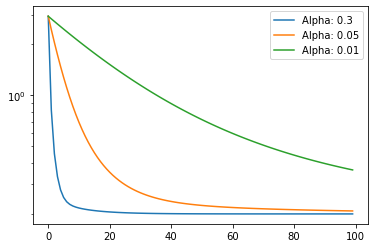

In [44]:
for ind,alpha in enumerate(alphas):
    plt.semilogy(losses[ind], label = "Alpha: "+str(alpha))
plt.legend()

In [45]:
print("Train error: %.5f" % losses[0][-1])
print("Test  error: %.5f" % test_losses[0])

Train error: 0.19990
Test  error: 0.19608


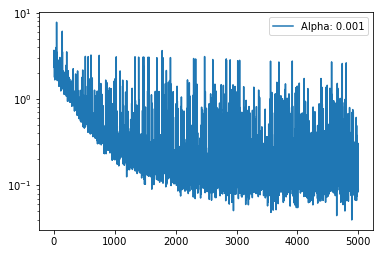

In [46]:
random.seed(215)
batch_losses = []
w = np.ones([X_train.shape[1],1])
for _ in range(5000):
    
    # create a random batch of 50 points and follow gradient
    X_batch, y_batch = zip(*random.sample(list(zip(X_train, y_train)), k=50))
    X_batch, y_batch = np.asarray(X_batch),np.asarray(y_batch)
    # apply batch gradient descent
    alpha = 0.001
    output = calc_gradient(y_batch,X_batch,w)
    for i in range(w.shape[0]):
        w[i] -= alpha*output['gradient'][i]
    
    # store the loss 
    batch_losses.append(output['loss'])
    

test_output = calc_gradient(y_test,X_test,w)
test_loss = test_output['loss']
# plot
plt.semilogy(batch_losses, label = "Alpha: "+str(alpha));
plt.legend();

In [47]:
print("Train error: %.5f" % batch_losses[-1])
print("Test error : %.5f" % test_loss)

Train error: 0.08886
Test error : 0.23189


### Polynomial Regression

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(9519, 4)
(2380, 4)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


X_train = np.hstack((np.ones([len(X_train),1]), X_train))
X_test  = np.hstack((np.ones([len(X_test),1]), X_test))

In [71]:
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test  = scaler.fit_transform(y_test.reshape(-1,1))

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # polynomial
from sklearn.pipeline import Pipeline # model
from sklearn.metrics import mean_squared_error # test

def ply_reg():

    ploy_reg = LinearRegression()
    pf = PolynomialFeatures(degree=8, include_bias=True, interaction_only=False)
    ploy_reg.fit(X_train, y_train)
    
    y_predict = ploy_reg.predict(X_test)
    print('MSE is: ',mean_squared_error(y_test, y_predict))
    
ply_reg()

MSE is:  0.39145741013166224


In [87]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train.ravel().astype('int'))
y_predict = LR.predict(X_test)
print('MSE is: ',mean_squared_error(y_test, y_predict))

MSE is:  0.64931602279709


/Users/xuyile/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
from sklearn.neural_network import MLPRegressor
MLPR = MLPRegressor()
MLPR.fit(X_train,y_train.ravel())
y_predict = MLPR.predict(X_test)
print('MSE is: ',mean_squared_error(y_test, y_predict))

MSE is:  0.31490109071958233


/Users/xuyile/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Random Forest
  
  1. Using Decision trees

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)



(9519, 4)
(2380, 4)


In [ ]:
#standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test  = scaler.fit_transform(y_test.reshape(-1,1))

In [6]:
from sklearn.tree import DecisionTreeRegressor

# train a decision tree regressor with a maximal depth of 1
tree = DecisionTreeRegressor(max_depth=10, random_state=5, criterion="mae")
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=10, random_state=5)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.796205 to fit



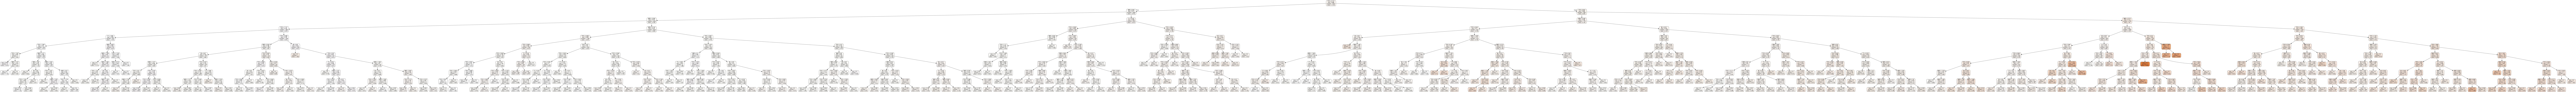

In [8]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_absolute_error

# a helper function to plot trees, it requires that you install
# the graphviz command line tool on your computer first
def plot_tree(model, features = df_X.columns):
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names=features,)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

plot_tree(tree)

In [10]:
print("Tree Test MAE: %.4f" % mean_absolute_error(tree.predict(X_test),y_test))
print("Tree Train MAE: %.4f" % mean_absolute_error(tree.predict(X_train),y_train))

Tree Test MAE: 0.3876
Tree Train MAE: 0.0490


In [20]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint 
from scipy.stats import uniform

# define the type of model
forest  = RandomForestRegressor(random_state = 0, criterion='mae')

# specify its possible parameters distributionss
param_dist = {
   'n_estimators'     :  randint(1,100), # specify using randint
   'max_features'     :  randint(1,X_train.shape[1]), # specify using randint
   'min_samples_leaf' :  randint(1,1000), # specify using randint
   'min_impurity_decrease': uniform(0,1) # specify using uniform
}

# Do 50 random draws from distribution of parameters
random_search = RandomizedSearchCV(
    forest, 
    param_distributions = param_dist,
    cv           = TimeSeriesSplit(10),    
    n_iter       = 20,
    random_state = 0,
    scoring      = 'neg_mean_absolute_error',    
)

# fit the random search procedure
random_search.fit(X_train,y_train)

# show the best parameter setting
random_search.best_params_

{'max_features': 2,
 'min_impurity_decrease': 0.09928035035897387,
 'min_samples_leaf': 58,
 'n_estimators': 36}

In [ ]:
optimal_tree = DecisionTreeRegressor(
    random_state=0,
    criterion='mae',
    min_impurity_decrease = random_search.best_params_["min_impurity_decrease"],
    min_samples_leaf = random_search.best_params_["min_samples_leaf"]
)
optimal_tree.fit(X_train, y_train)
plot_tree(optimal_tree)